In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [77]:
sap=pd.read_csv("Breast_Cancer.csv")

In [78]:
sap.head()

,Age,Race,Marital Status,T_stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [79]:
sap.dtypes

Age                        int64
Race                      object
Marital Status            object
T_stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [80]:
LEncoder = LabelEncoder()
sap['Status'] = LEncoder.fit_transform(sap['Status'])
sap['Marital Status'] = LEncoder.fit_transform(sap['Marital Status'])
sap['N Stage'] = LEncoder.fit_transform(sap['N Stage'])
sap['6th Stage'] = LEncoder.fit_transform(sap['6th Stage'])
sap['differentiate'] = LEncoder.fit_transform(sap['differentiate'])
sap['A Stage'] = LEncoder.fit_transform(sap['A Stage'])
sap['Estrogen Status'] = LEncoder.fit_transform(sap['Estrogen Status'])
sap['Progesterone Status'] = LEncoder.fit_transform(sap['Progesterone Status'])
sap['Grade'] = LEncoder.fit_transform(sap['Grade'])
sap['Race'] = LEncoder.fit_transform(sap['Race'])
sap['T_stage'] = LEncoder.fit_transform(sap['T_stage'])

In [81]:
sap

,Age,Race,Marital Status,T_stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,1,1,49,0
4020,56,2,0,1,1,2,0,2,1,46,1,1,14,8,69,0
4021,68,2,1,1,0,1,0,2,1,22,1,0,11,3,69,0
4022,58,0,0,1,0,1,0,2,1,44,1,1,11,1,72,0


In [82]:
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.preprocessing import OneHotEncoder
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored

In [83]:
X=sap.drop(["Survival Months","Status"],axis=1)
Y=sap[["Status", "Survival Months"]]

X

,Age,Race,Marital Status,T_stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,1,1
4020,56,2,0,1,1,2,0,2,1,46,1,1,14,8
4021,68,2,1,1,0,1,0,2,1,22,1,0,11,3
4022,58,0,0,1,0,1,0,2,1,44,1,1,11,1


In [84]:
Y

,Status,Survival Months
0,0,60
1,0,62
2,0,75
3,0,84
4,0,50
...,...,...
4019,0,49
4020,0,69
4021,0,69
4022,0,72


In [85]:
#data_y=Y. to_numpy()
Y.dtypes

Status             int32
Survival Months    int64
dtype: object

In [86]:
# dt=np.dtype([('Status', '?'), ('Survival Months', '<f8')])
# data_y=np.array(Y,dtype=dt)
# data_y

In [87]:
yy=Y.to_numpy()
yy

array([[  0,  60],
       [  0,  62],
       [  0,  75],
       ...,
       [  0,  69],
       [  0,  72],
       [  0, 100]], dtype=int64)

In [90]:
#List of tuples
aux = [(e1,e2) for e1,e2 in yy]

#Structured array
data_y = np.array(aux, dtype=[('Status', '?'), ('Survival Months', '<f8')])
data_y

array([(False,  60.), (False,  62.), (False,  75.), ..., (False,  69.),
       (False,  72.), (False, 100.)],
      dtype=[('Status', '?'), ('Survival Months', '<f8')])

Text(0.5, 0, 'time $t$')

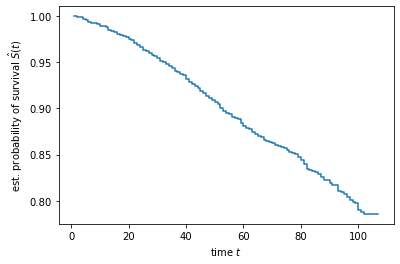

In [91]:
time, survival_prob = kaplan_meier_estimator(data_y["Status"],data_y["Survival Months"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")